**NOTEBOOK FOR IN DEPTH ANALYSIS OF RUNNING DATA**

Author : Andrea Valente

Date: June, 2022

In [69]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
import datetime
from pandas.plotting import scatter_matrix

In [70]:
# 1. Create directory path using today's date
today = datetime.datetime.now().strftime("%d%m%Y")  # Formats date as '03062023'
folder_name = f"{today}_report"
path = os.path.join(folder_name, "plots")

# Create directories if they don't exist
if not os.path.exists(path):
    os.makedirs(path)

same general stats as in java project +
* histogram of pace
* ml model to predict performance (you will have to find an indicator of good performance)

# Helper functions

In [71]:
def list_element_to_int(my_list:list):
    """
    returns elements of a list as integers
    """
    try:
        res = [int(x) for x in my_list]
        if len(res) > 2:
            return res[0] * 3600 + res[1] * 60 + res[2]
        else:
            return res[0] * 60 + res[1]
    except Exception as e:
        return np.nan

In [72]:
def hms_to_secs(time: pd.Series):
    """
    Converts time in the h:m:s format to seconds using the list_element_to_int fun
    """
    temp = time.apply(lambda x: x.split('.')[0]) # remove decimals (all after .)  
    temp2 = temp.str.split(':')
    return temp2.apply(lambda x: list_element_to_int(x))

How to write a function that takes a string and can be applied to pandas Series (df column)

# Load data

In [73]:
rundata = pd.read_csv('../data/Activities.csv')
print('Shape of running dataset: ' + str(rundata.shape))

Shape of running dataset: (569, 39)


In [74]:
rundata.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Training Stress Score®,Avg Power,Max Power,Grit,Flow,Avg. Swolf,Avg Stroke Rate,Total Reps,Dive Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2023-10-24 18:54:18,False,Strovolos - Base,7.73,596,00:53:01,157,179,3.6,156,169,6:52,6:07,35,36,0.93,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,28.0,0:00,No,00:01.08,9,31.0,00:52:53,00:53:09,176,185
1,Running,2023-10-22 18:26:19,False,Strovolos Running,5.00,377,00:29:22,167,189,4.0,168,184,5:52,5:08,22,27,1.01,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,27.0,0:00,No,00:01.51,6,32.0,00:29:17,00:29:29,177,186
2,Running,2023-10-20 18:45:48,False,Strovolos Running,10.00,741,01:13:43,153,172,3.3,154,160,7:22,6:46,44,47,0.88,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,26.0,0:00,No,00:01.02,11,30.0,01:13:35,01:14:04,175,185
3,Running,2023-10-18 18:40:04,False,Strovolos Running,8.05,598,00:57:24,149,166,3.2,154,162,7:08,6:34,51,53,0.91,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,25.0,0:00,No,00:18.57,9,31.0,00:57:15,00:57:33,175,185
4,Running,2023-10-16 18:32:53,False,Strovolos - Base,4.50,336,00:33:02,145,159,2.8,154,158,7:20,6:49,30,33,0.89,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,26.0,0:00,No,00:01.98,6,31.0,00:33:01,00:33:02,177,186


# Prepare and analyze

## Set columns

In [75]:
cols = ['Date','Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent',
       'Total Descent', 'Avg Stride Length',
       'Best Lap Time', 'Moving Time',
       'Elapsed Time', 'Min Elevation', 'Max Elevation'] #'Aerobic TE',

In [76]:
rundata = rundata[cols]

In [77]:
rundata.head()

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,2023-10-24 18:54:18,Strovolos - Base,7.73,596,00:53:01,157,179,156,169,6:52,6:07,35,36,0.93,00:01.08,00:52:53,00:53:09,176,185
1,2023-10-22 18:26:19,Strovolos Running,5.00,377,00:29:22,167,189,168,184,5:52,5:08,22,27,1.01,00:01.51,00:29:17,00:29:29,177,186
2,2023-10-20 18:45:48,Strovolos Running,10.00,741,01:13:43,153,172,154,160,7:22,6:46,44,47,0.88,00:01.02,01:13:35,01:14:04,175,185
3,2023-10-18 18:40:04,Strovolos Running,8.05,598,00:57:24,149,166,154,162,7:08,6:34,51,53,0.91,00:18.57,00:57:15,00:57:33,175,185
4,2023-10-16 18:32:53,Strovolos - Base,4.50,336,00:33:02,145,159,154,158,7:20,6:49,30,33,0.89,00:01.98,00:33:01,00:33:02,177,186


In [78]:
#rundata.Title.value_counts()

## Check data types

In [79]:
rundata.dtypes

Date                  object
Title                 object
Distance             float64
Calories              object
Time                  object
Avg HR                 int64
Max HR                 int64
Avg Run Cadence        int64
Max Run Cadence        int64
Avg Pace              object
Best Pace             object
Total Ascent          object
Total Descent         object
Avg Stride Length    float64
Best Lap Time         object
Moving Time           object
Elapsed Time          object
Min Elevation         object
Max Elevation         object
dtype: object

In [80]:
rundata['Short_date'] = rundata['Date'].str[0:10]

In [81]:
rundata['Date'] = pd.to_datetime(rundata['Date'], infer_datetime_format=True)

C:\Users\valen\AppData\Local\Temp\ipykernel_7264\1567046397.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  rundata['Date'] = pd.to_datetime(rundata['Date'], infer_datetime_format=True)


In [82]:
rundata.sort_values(by=['Date'],inplace=True)

In [83]:
rundata['Calories'] = rundata['Calories'].replace(',','',regex=True).astype(int)

## Add new columns

In [84]:
rundata['Distance_in_miles'] = (rundata['Distance'] / 1.609344)

In [85]:
rundata['Time_in_secs'] = hms_to_secs(rundata['Time'])

In [86]:
rundata['Avg_pace_secs'] = hms_to_secs(rundata['Avg Pace'])  

In [87]:
rundata['Best_pace_secs'] = hms_to_secs(rundata['Best Pace'])  

In [88]:
rundata['Hour_of_day'] = rundata['Date'].dt.hour

In [89]:
rundata['Month'] = rundata['Date'].dt.month.astype(str)

In [90]:
rundata['Month_Year'] = rundata['Date'].dt.to_period('M')

In [91]:
rundata['Day_of_week'] = rundata['Date'].dt.dayofweek

In [92]:
rundata['Short_date'] = pd.to_datetime(rundata['Short_date'])

In [93]:
# moving averages pace
rundata['Pace_MA_7'] = rundata['Avg_pace_secs'].rolling(7).mean()
rundata['Pace_MA_30'] = rundata['Avg_pace_secs'].rolling(30).mean()

In [94]:
# moving averages distance
rundata['Distance_MA_7'] = rundata['Distance'].rolling(7).mean()
rundata['Distance_MA_30'] = rundata['Distance'].rolling(30).mean()
rundata['Distance_MA_60'] = rundata['Distance'].rolling(60).mean()

In [95]:
# heart rate moving averages
rundata['Avg_HR_MA_7'] = rundata['Avg HR'].rolling(7).mean()
rundata['Avg_HR_MA_30'] = rundata['Avg HR'].rolling(30).mean()
rundata['Avg_HR_MA_60'] = rundata['Avg HR'].rolling(60).mean()

In [96]:
rundata.head(2)

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Day_of_week,Pace_MA_7,Pace_MA_30,Distance_MA_7,Distance_MA_30,Distance_MA_60,Avg_HR_MA_7,Avg_HR_MA_30,Avg_HR_MA_60
568,2020-10-11 13:19:38,Appiano Gentile Corsa,0.85,61,00:05:00.0,150,173,160,164,5:55,4:24,--,17,1.06,05:00.02,00:04:59,00:05:00.0,339,357,2020-10-11,0.528166,300,355,264,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,2020-10-11 13:27:38,Appiano Gentile Corsa,0.79,62,00:05:00.4,153,167,158,160,6:19,5:35,5,7,1.00,05:00.38,00:04:59,00:05:00.4,339,346,2020-10-11,0.490883,300,379,335,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
rundata.sort_values(by =['Date'],inplace=True)

In [98]:
rundata.reset_index(drop=True,inplace=True)

In [99]:
rundata.head(2)

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Day_of_week,Pace_MA_7,Pace_MA_30,Distance_MA_7,Distance_MA_30,Distance_MA_60,Avg_HR_MA_7,Avg_HR_MA_30,Avg_HR_MA_60
0,2020-10-11 13:19:38,Appiano Gentile Corsa,0.85,61,00:05:00.0,150,173,160,164,5:55,4:24,--,17,1.06,05:00.02,00:04:59,00:05:00.0,339,357,2020-10-11,0.528166,300,355,264,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-11 13:27:38,Appiano Gentile Corsa,0.79,62,00:05:00.4,153,167,158,160,6:19,5:35,5,7,1.00,05:00.38,00:04:59,00:05:00.4,339,346,2020-10-11,0.490883,300,379,335,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fix dtypes

In [100]:
rundata['Hour_of_day'] = rundata['Hour_of_day'].astype(str)
rundata['Day_of_week'] = rundata['Day_of_week'].astype(str)

Min/Max elevation have "--" when not available. We need to replace them before converting to int

In [101]:
rundata['Min Elevation'].unique()

array(['339', '338', '39', '40', '38', '36', '342', '341', '332', '334',
       '340', '35', '34', '1', '6', '-1', '33', '11', '29', '333', '331',
       '30', '175', '4', '--', '32', '26', '330', '37', '31', '28', '20',
       '21', '25', '24', '-44', '174', '169', '147', '161', '14', '15',
       '16', '19', '58', '66', '171', '79', '78', '176', '159', '156',
       '140', '158', '337', '198', '178', '173', '453', '172', '170',
       '343', '177', '181', '187', '179', '180', '191', '13', '12', '184'],
      dtype=object)

In [102]:
rundata['Total Descent'].unique()

array(['17', '7', '2', '18', '8', '9', '33', '4', '--', '3', '6', '1',
       '5', '11', '10', '15', '12', '16', '0', '13', '19', '21', '20',
       '23', '25', '22', '24', '26', '41', '27', '34', '42', '32', '44',
       '55', '36', '47', '30', '14', '43', '49', '37', '39', '29', '60',
       '35', '45', '31', '28', '64', '61', '54', '38', '50', '56', '53',
       '117', '52', '77', '72', '66', '57', '40', '74', '94', '87', '73',
       '81', '112', '48', '70', '46', '69', '133', '119', '58', '92',
       '98', '132', '62', '78', '115', '146', '104', '101', '59', '88',
       '139', '76', '63', '65'], dtype=object)

In [103]:
rundata['Max Elevation'].unique()

array(['357', '346', '341', '356', '347', '349', '42', '43', '44', '45',
       '40', '46', '348', '350', '358', '47', '48', '52', '58', '51',
       '84', '60', '53', '54', '70', '65', '14', '26', '27', '57', '77',
       '64', '63', '50', '71', '49', '61', '68', '59', '87', '365', '351',
       '91', '56', '67', '72', '188', '36', '38', '37', '66', '69', '120',
       '62', '106', '55', '79', '78', '92', '75', '83', '95', '--', '73',
       '76', '88', '182', '183', '187', '186', '10', '31', '24', '33',
       '32', '184', '96', '74', '85', '185', '168', '171', '173', '209',
       '190', '178', '499', '181', '180', '189', '192', '200', '191',
       '179', '18', '16', '196', '195'], dtype=object)

In [104]:
rundata['Min Elevation'] =rundata['Min Elevation'].replace("--",0)
rundata['Max Elevation'] =rundata['Max Elevation'].replace("--",0)

In [105]:
rundata['Min Elevation'] = rundata['Min Elevation'].astype(int)
rundata['Max Elevation'] = rundata['Max Elevation'].astype(int)

In [106]:
rundata['Total Descent'] = rundata['Total Descent'].replace("--",0)
rundata['Total Descent'] = rundata['Total Descent'].astype(int)

## List descriptive columns to facilitate visualization

In [107]:
desc_cols = ['Distance','Avg HR','Total Descent','Max HR','Avg Run Cadence','Max Run Cadence','Avg Stride Length',
            'Time_in_secs','Avg_pace_secs','Hour_of_day','Calories','Best_pace_secs']

## Check correlations

In [108]:
corr = rundata[desc_cols].corr(method='pearson')

In [109]:
corr.style.background_gradient(cmap='coolwarm')

,Distance,Avg HR,Total Descent,Max HR,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Time_in_secs,Avg_pace_secs,Hour_of_day,Calories,Best_pace_secs
Distance,1.000000,0.208525,0.588282,0.157051,-0.123345,-0.022807,-0.416349,0.994226,0.411583,-0.101154,0.991920,0.317485
Avg HR,0.208525,1.000000,0.015944,0.849899,0.113134,-0.147177,-0.222859,0.206992,0.133560,-0.113039,0.274492,0.176899
Total Descent,0.588282,0.015944,1.000000,-0.025622,-0.199628,-0.039081,-0.295470,0.594138,0.345960,-0.078311,0.578957,0.190456
Max HR,0.157051,0.849899,-0.025622,1.000000,0.093449,-0.086731,-0.192526,0.150153,0.103584,-0.081579,0.214598,0.149963
Avg Run Cadence,-0.123345,0.113134,-0.199628,0.093449,1.000000,-0.010199,0.325958,-0.166947,-0.609162,-0.121461,-0.117580,-0.038096
Max Run Cadence,-0.022807,-0.147177,-0.039081,-0.086731,-0.010199,1.000000,0.338159,-0.053038,-0.285749,0.090548,-0.046463,-0.508882
Avg Stride Length,-0.416349,-0.222859,-0.295470,-0.192526,0.325958,0.338159,1.000000,-0.475226,-0.926042,0.192999,-0.456520,-0.421204
Time_in_secs,0.994226,0.206992,0.594138,0.150153,-0.166947,-0.053038,-0.475226,1.000000,0.482644,-0.117245,0.990895,0.337078
Avg_pace_secs,0.411583,0.133560,0.345960,0.103584,-0.609162,-0.285749,-0.926042,0.482644,1.000000,-0.141008,0.447332,0.374799
Hour_of_day,-0.101154,-0.113039,-0.078311,-0.081579,-0.121461,0.090548,0.192999,-0.117245,-0.141008,1.000000,-0.115576,-0.108545


## Plot correlations

In [110]:
corr_cols = ['Distance','Avg HR','Avg Run Cadence','Avg Stride Length',
            'Time_in_secs','Avg_pace_secs','Calories','Best_pace_secs']

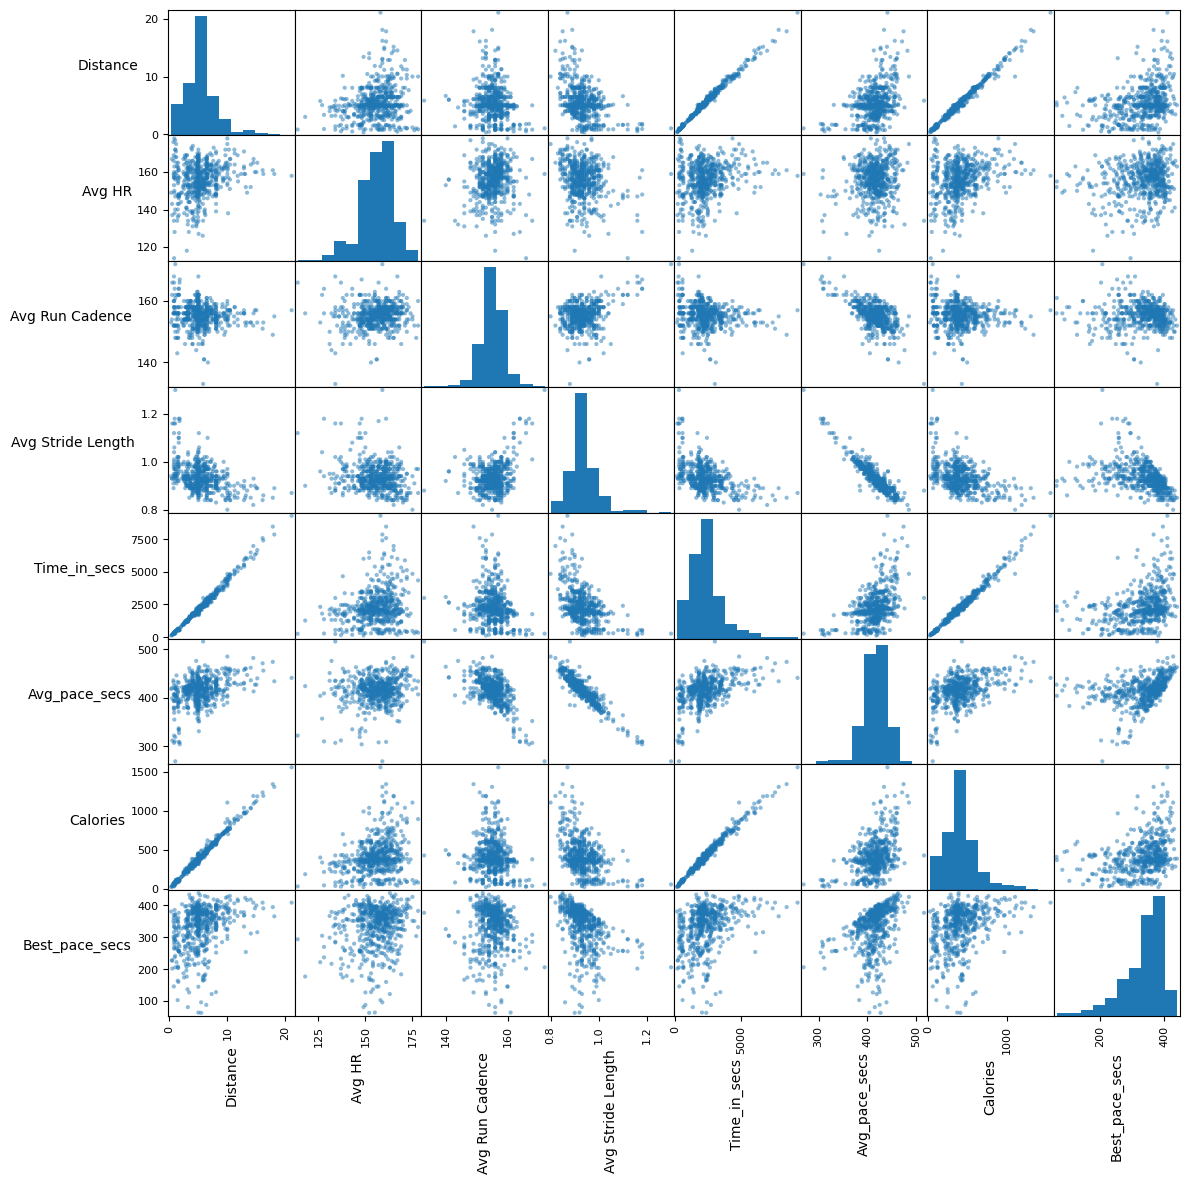

In [111]:
axes = scatter_matrix(rundata[corr_cols], figsize=(12, 12))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [112]:
rundata[desc_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Distance,569.0,5.495237,2.933025,0.3,3.94,5.01,6.59,21.1
Avg HR,569.0,155.769772,9.336137,114.0,151.00,157.00,162.00,178.0
Total Descent,569.0,28.193322,23.292489,0.0,10.00,24.00,39.00,146.0
Max HR,569.0,175.432337,10.391428,131.0,170.00,176.00,183.00,205.0
Avg Run Cadence,569.0,155.304042,3.816753,133.0,153.00,156.00,157.00,172.0
Max Run Cadence,569.0,167.474517,11.763207,152.0,162.00,164.00,169.00,240.0
Avg Stride Length,569.0,0.934323,0.056764,0.8,0.90,0.93,0.96,1.3
Time_in_secs,569.0,2312.924429,1312.740976,125.0,1621.00,2102.00,2809.00,9294.0
Avg_pace_secs,569.0,414.880492,27.541258,269.0,403.00,418.00,431.00,516.0
Calories,569.0,414.739895,225.022243,21.0,288.00,376.00,506.00,1556.0


In [113]:
rundata.head(2)

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Day_of_week,Pace_MA_7,Pace_MA_30,Distance_MA_7,Distance_MA_30,Distance_MA_60,Avg_HR_MA_7,Avg_HR_MA_30,Avg_HR_MA_60
0,2020-10-11 13:19:38,Appiano Gentile Corsa,0.85,61,00:05:00.0,150,173,160,164,5:55,4:24,--,17,1.06,05:00.02,00:04:59,00:05:00.0,339,357,2020-10-11,0.528166,300,355,264,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-11 13:27:38,Appiano Gentile Corsa,0.79,62,00:05:00.4,153,167,158,160,6:19,5:35,5,7,1.00,05:00.38,00:04:59,00:05:00.4,339,346,2020-10-11,0.490883,300,379,335,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plots

## Average pace by day of week

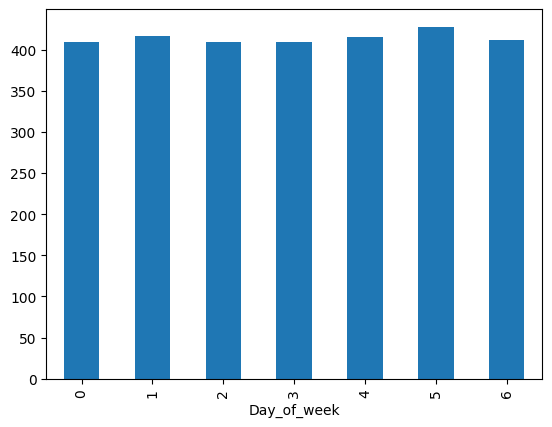

In [114]:
rundata.groupby('Day_of_week')['Avg_pace_secs'].mean().plot.bar()
file_path = os.path.join(path, "days_week_average.png")
plt.savefig(file_path, dpi=300, bbox_inches='tight')

## Average pace with moving averages

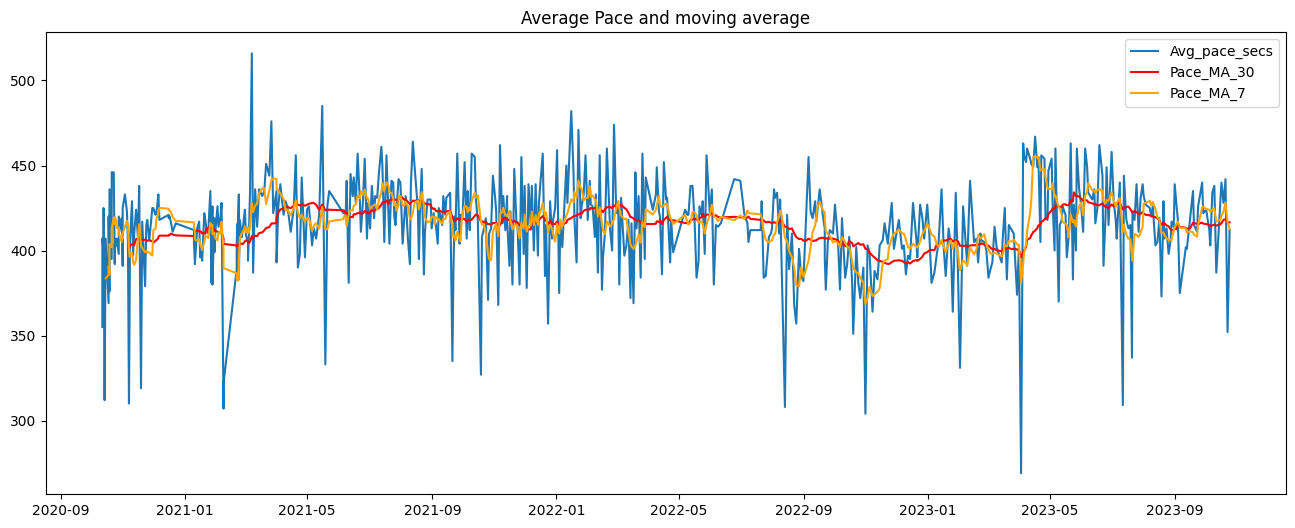

In [115]:
plt.figure(figsize=(16,6))
plt.title("Average Pace and moving average")
plt.plot(rundata['Date'],rundata['Avg_pace_secs'],label='avg pace')
plt.plot(rundata['Date'],rundata['Pace_MA_30'],label='mov avg 30', color='red') #linestyle="-."
plt.plot(rundata['Date'],rundata['Pace_MA_7'],label='mov avg 7',color='orange')
plt.legend(['Avg_pace_secs','Pace_MA_30','Pace_MA_7'])
file_path = os.path.join(path, "average_pace_ma.png")
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

## Distance with moving average

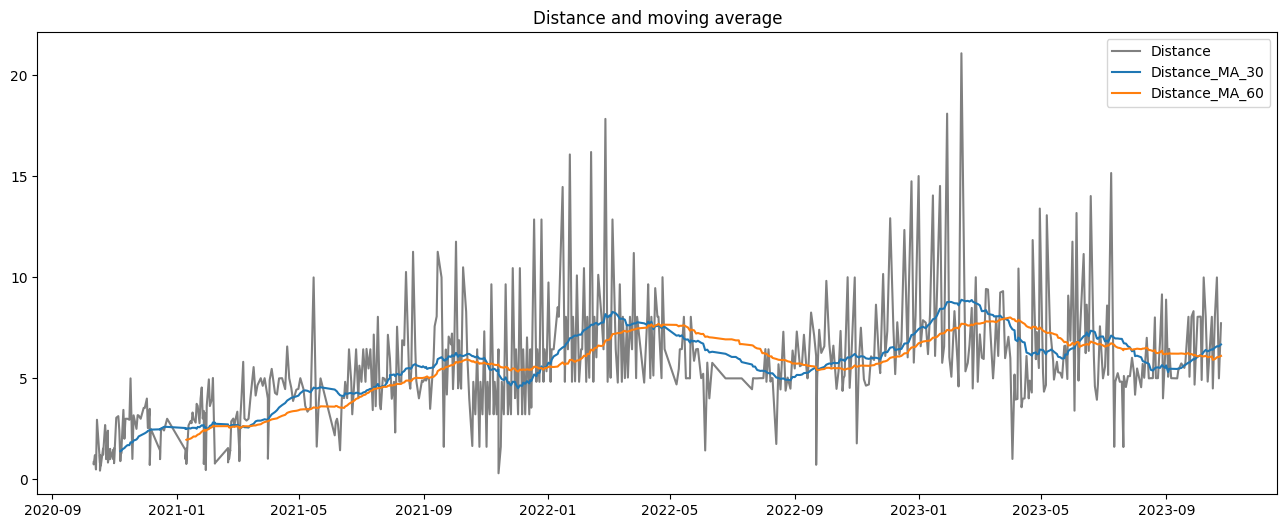

In [116]:
plt.figure(figsize=(16,6))
plt.title("Distance and moving average")
plt.plot(rundata['Date'],rundata['Distance'],label='distance',color='grey')
plt.plot(rundata['Date'],rundata['Distance_MA_30'],label = 'MA 30 days')
plt.plot(rundata['Date'],rundata['Distance_MA_60'],label = 'MA 60 days')
plt.legend(['Distance','Distance_MA_30','Distance_MA_60'])
file_path = os.path.join(path, "distance_ma.png")
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

## HR with moving average

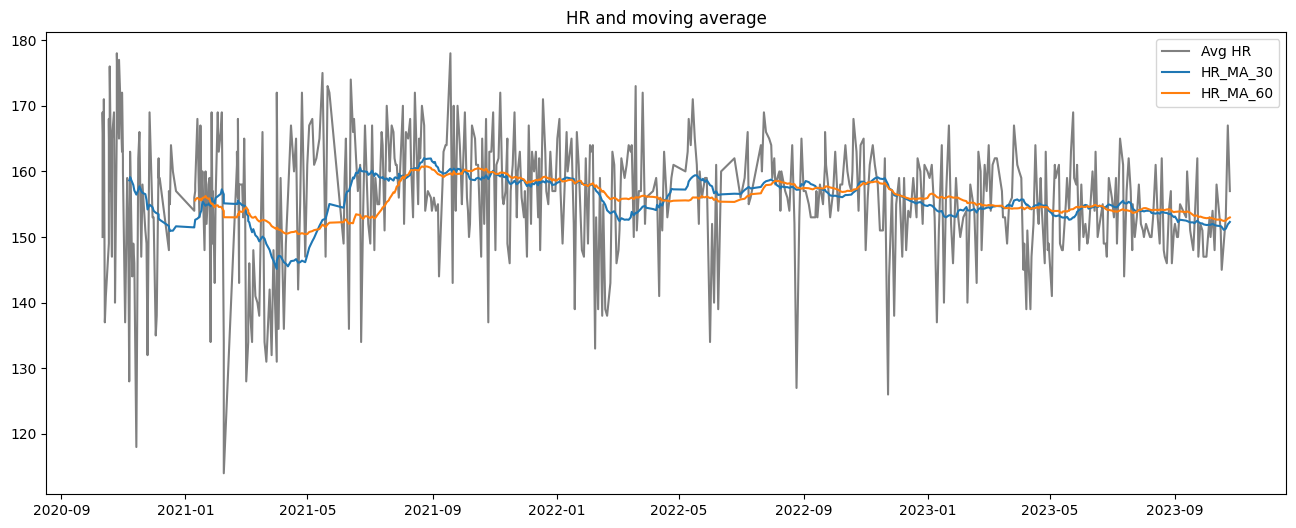

In [117]:
plt.figure(figsize=(16,6))
plt.title("HR and moving average")
plt.plot(rundata['Date'],rundata['Avg HR'],label='distance',color='grey')
plt.plot(rundata['Date'],rundata['Avg_HR_MA_30'],label = 'HR 30 days')
plt.plot(rundata['Date'],rundata['Avg_HR_MA_60'],label = 'HR 60 days')
plt.legend(['Avg HR','HR_MA_30','HR_MA_60'])
file_path = os.path.join(path, "hr_ma.png")
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

## Histogram of average pace

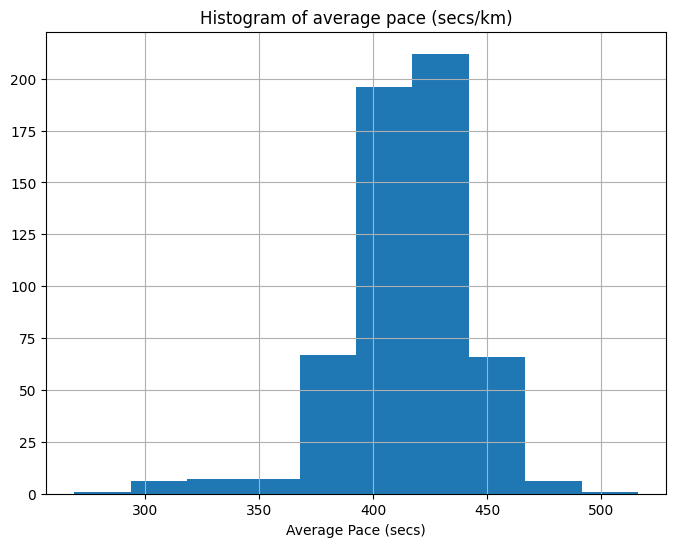

In [118]:
plt.figure(figsize=(8,6))
plt.title('Histogram of average pace (secs/km)')
plt.xlabel('Average Pace (secs)')
plt.hist(rundata['Avg_pace_secs'])
plt.grid()
file_path = os.path.join(path, "avg_pace_hist.png")
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

# With Density

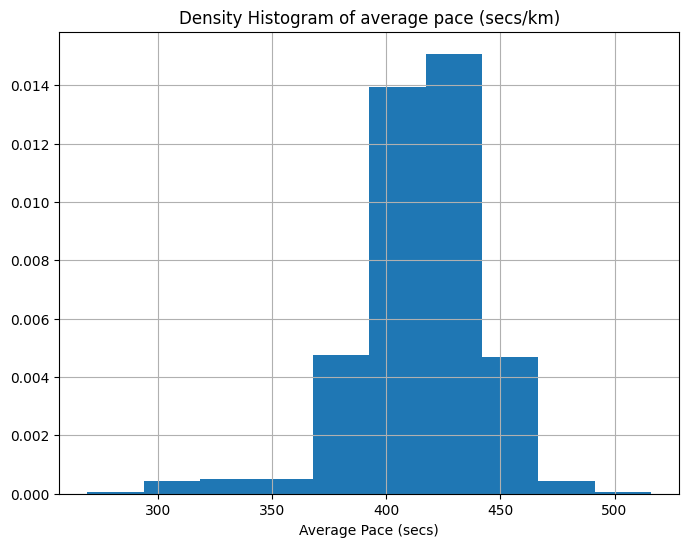

In [119]:
plt.figure(figsize=(8,6))
plt.title('Density Histogram of average pace (secs/km)')
plt.xlabel('Average Pace (secs)')
plt.hist(rundata['Avg_pace_secs'], density=True)
plt.grid()
plt.show()

## Histogram of HR

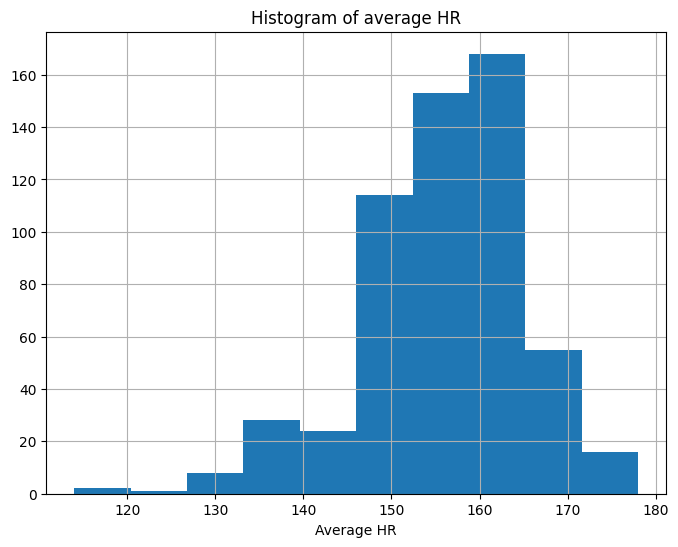

In [120]:
plt.figure(figsize=(8,6))
plt.title('Histogram of average HR')
plt.xlabel('Average HR')
plt.hist(rundata['Avg HR'])
plt.grid()
file_path = os.path.join(path, "hr_hist.png")
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

In [121]:
rundata[desc_cols].corr()

,Distance,Avg HR,Total Descent,Max HR,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Time_in_secs,Avg_pace_secs,Hour_of_day,Calories,Best_pace_secs
Distance,1.000000,0.208525,0.588282,0.157051,-0.123345,-0.022807,-0.416349,0.994226,0.411583,-0.101154,0.991920,0.317485
Avg HR,0.208525,1.000000,0.015944,0.849899,0.113134,-0.147177,-0.222859,0.206992,0.133560,-0.113039,0.274492,0.176899
Total Descent,0.588282,0.015944,1.000000,-0.025622,-0.199628,-0.039081,-0.295470,0.594138,0.345960,-0.078311,0.578957,0.190456
Max HR,0.157051,0.849899,-0.025622,1.000000,0.093449,-0.086731,-0.192526,0.150153,0.103584,-0.081579,0.214598,0.149963
Avg Run Cadence,-0.123345,0.113134,-0.199628,0.093449,1.000000,-0.010199,0.325958,-0.166947,-0.609162,-0.121461,-0.117580,-0.038096
Max Run Cadence,-0.022807,-0.147177,-0.039081,-0.086731,-0.010199,1.000000,0.338159,-0.053038,-0.285749,0.090548,-0.046463,-0.508882
Avg Stride Length,-0.416349,-0.222859,-0.295470,-0.192526,0.325958,0.338159,1.000000,-0.475226,-0.926042,0.192999,-0.456520,-0.421204
Time_in_secs,0.994226,0.206992,0.594138,0.150153,-0.166947,-0.053038,-0.475226,1.000000,0.482644,-0.117245,0.990895,0.337078
Avg_pace_secs,0.411583,0.133560,0.345960,0.103584,-0.609162,-0.285749,-0.926042,0.482644,1.000000,-0.141008,0.447332,0.374799
Hour_of_day,-0.101154,-0.113039,-0.078311,-0.081579,-0.121461,0.090548,0.192999,-0.117245,-0.141008,1.000000,-0.115576,-0.108545


[Text(0.5, 1.0, 'Avg Pace vs Distance')]

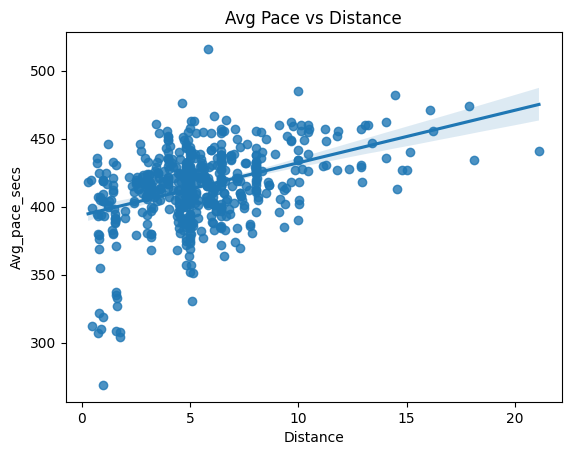

In [122]:
sns.regplot(x='Distance',y='Avg_pace_secs',data=rundata, fit_reg=True).set(title='Avg Pace vs Distance')

## Histogram of Avg Run Cadence

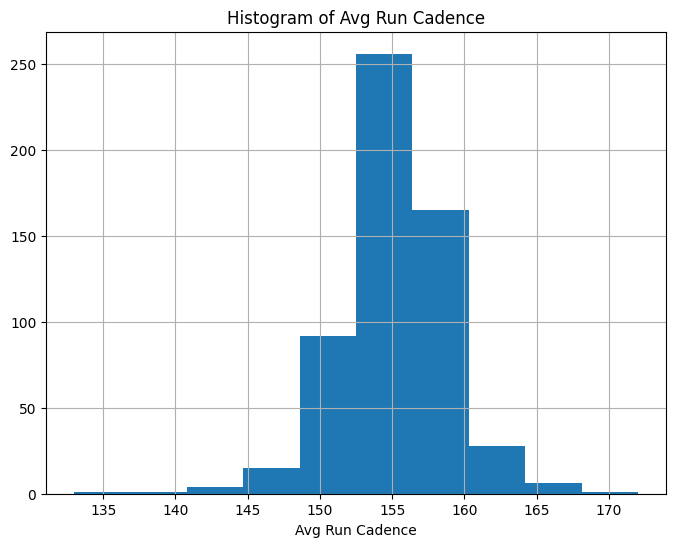

In [123]:
plt.figure(figsize=(8,6))
plt.title('Histogram of Avg Run Cadence')
plt.xlabel('Avg Run Cadence')
plt.grid()
plt.hist(rundata['Avg Run Cadence'])
file_path = os.path.join(path, "avg_run_cadence_hist.png")
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

## Histogram of Distance

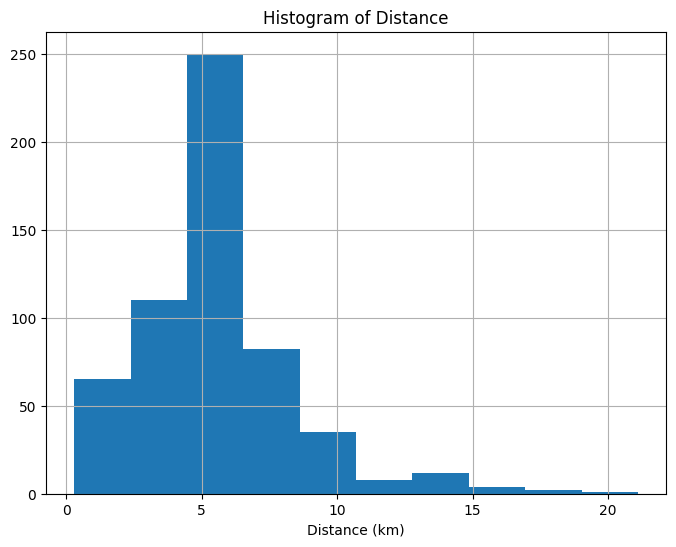

In [124]:
plt.figure(figsize=(8,6))
plt.title('Histogram of Distance')
plt.xlabel('Distance (km)')
plt.grid()
plt.hist(rundata['Distance'])
file_path = os.path.join(path, "distance_hist.png")
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

In [125]:
rundata['Distance'].value_counts().head(10)

Distance
4.83     31
5.01     25
6.44     24
8.05     22
5.00     22
3.22     13
3.00      7
1.61      5
10.00     5
1.00      5
Name: count, dtype: int64

## Histogram of calories

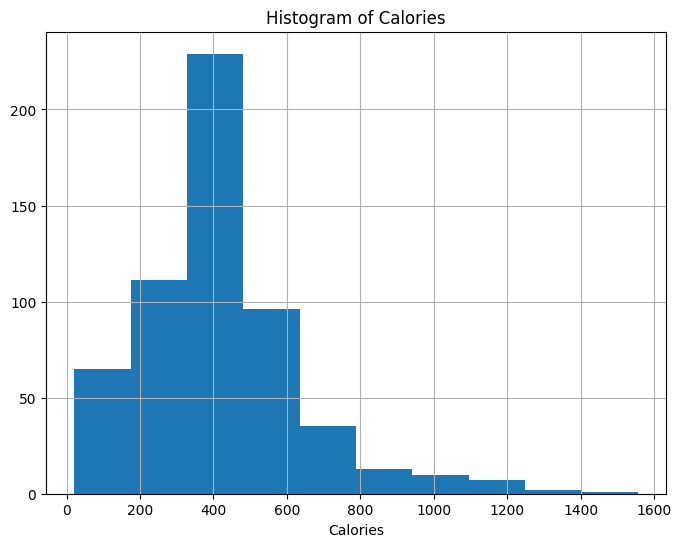

In [126]:
plt.figure(figsize=(8,6))
plt.title('Histogram of Calories')
plt.xlabel('Calories')
plt.grid()
plt.hist(rundata['Calories'])
file_path = os.path.join(path, "calories_hist.png")
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

# Summaries

## Fastest runs

In [127]:
def print_best_perf(data: pd.DataFrame,distance: float, n=int):
    """
    Function that prints best performances based on distance and number of runs
    @data: dataset
    @param distance: Distance of the run
    @param n: number of top performances
    """
    print('Fastest {}k runs: '.format(distance))
    print()
    print(data[(data['Distance']<=distance+0.01) & (data['Distance']>=distance-0.01)].sort_values(by=['Avg_pace_secs']).head(n)[['Date','Distance','Time','Avg Pace']])
    print()


In [128]:
print_best_perf(rundata,6.44,3)

Fastest 6.44k runs: 

                   Date  Distance      Time Avg Pace
393 2022-10-26 17:59:56      6.45  00:40:01     6:12
303 2022-03-24 19:00:49      6.44  00:41:14     6:24
183 2021-08-23 17:08:37      6.44  00:41:22     6:26



In [129]:
main_distances = [3.22,4.83,5,6.44,8.05,10]

In [130]:
# File name for the text file
filename = os.path.join(folder_name, "best_perfs.txt")

# Redirect standard output to a file
original_stdout = sys.stdout
sys.stdout = open(filename, 'w')

# Execute your function
for i in main_distances:
    print_best_perf(rundata,i,3)

# Reset standard output to original
sys.stdout.close()
sys.stdout = original_stdout

# print it
for i in main_distances:
    print_best_perf(rundata,i,3)


# for i in main_distances:
#     print_best_perf(rundata,i,3)

Fastest 3.22k runs: 

                   Date  Distance      Time Avg Pace
226 2021-11-04 19:22:22      3.22  00:19:43     6:08
243 2021-12-02 18:09:48      3.22  00:20:15     6:18
235 2021-11-18 18:15:35      3.22  00:20:24     6:20

Fastest 4.83k runs: 

                   Date  Distance      Time Avg Pace
255 2021-12-23 17:57:55      4.83  00:28:41     5:57
297 2022-03-14 18:37:06      4.83  00:29:57     6:12
261 2022-01-03 16:32:55      4.83  00:30:11     6:15

Fastest 5k runs: 

                   Date  Distance      Time Avg Pace
567 2023-10-22 18:26:19      5.00  00:29:22     5:52
299 2022-03-17 18:24:05      5.01  00:30:50     6:09
535 2023-08-18 19:39:36      5.01  00:31:10     6:13

Fastest 6.44k runs: 

                   Date  Distance      Time Avg Pace
393 2022-10-26 17:59:56      6.45  00:40:01     6:12
303 2022-03-24 19:00:49      6.44  00:41:14     6:24
183 2021-08-23 17:08:37      6.44  00:41:22     6:26

Fastest 8.05k runs: 

                   Date  Distance      Ti

## Totals and averages

In [131]:
# File name for the text file
filename = os.path.join(folder_name, "general_stats.txt")

# Redirect standard output to a file
original_stdout = sys.stdout
sys.stdout = open(filename, 'w')

print('Total calories burnt: ' + str(rundata['Calories'].sum()))
print('Total distance run: ' + str(round(rundata['Distance'].sum(),1)))
print('Average pace (km): ' + str(round(rundata['Avg_pace_secs'].mean(),2)))
print('Average heart rate: ' + str(round(rundata['Avg HR'].mean(),2)))
print('Average distance ran: ' + str(round(rundata['Distance'].mean(),2)))
print('Longest distance ran: ' + str(rundata['Distance'].max()))

# Reset standard output to original
sys.stdout.close()
sys.stdout = original_stdout

# Year on Year

In [132]:
rundata.loc[:,'Year'] = rundata['Short_date'].dt.year

In [133]:
# File name for the text file
filename = os.path.join(folder_name, "avg_pace_years.csv")

# Compute the aggregation
agg_pace_data = rundata.groupby('Year').Avg_pace_secs.agg(['mean', 'std', 'min', 'max'])

# Save to text file
with open(filename, 'w') as f:
    agg_pace_data.to_csv(f, sep='\t', header=True, index=True)

print(agg_pace_data)

#rundata.groupby('Year').Avg_pace_secs.agg(['mean', 'std','min','max'])

            mean        std  min  max
Year                                 
2020  406.333333  28.475135  310  446
2021  418.640394  26.277343  307  516
2022  411.790123  26.378146  304  482
2023  416.408163  29.260698  269  467


In [134]:
# File name for the text file
filename = os.path.join(folder_name, "avg_distance_years.csv")

# Compute the aggregation
agg_distance_data = rundata.groupby('Year').Distance.agg(['mean', 'std','min','max'])

# Save to text file
with open(filename, 'w') as f:
    agg_distance_data.to_csv(f, sep='\t', header=True, index=True)


print(agg_distance_data)

          mean       std   min    max
Year                                 
2020  1.985789  1.088572  0.43   5.00
2021  4.626847  2.353234  0.30  12.87
2022  6.703333  2.657170  0.72  17.85
2023  6.723878  2.927341  1.01  21.10


In [135]:
# probability of running times

In [148]:
from scipy.stats import gaussian_kde

# Assuming you already have 'rundata' DataFrame with 'Avg_pace_secs' column

# 2. Use KDE to estimate the probability distribution
data = rundata['Avg_pace_secs']
kde = gaussian_kde(data)

# Convert 'MM:SS' format to seconds
def pace_to_seconds(pace):
    minutes, seconds = map(int, pace.split(':'))
    return minutes * 60 + seconds

# 3. Create functions to compute the probability
def probability_faster_than(pace):
    pace_in_seconds = pace_to_seconds(pace)
    return kde.integrate_box_1d(min(data), pace_in_seconds)

def probability_slower_than(pace):
    pace_in_seconds = pace_to_seconds(pace)
    return kde.integrate_box_1d(pace_in_seconds, max(data))

# Test
print(f"{probability_faster_than('6:40'):.2%}")
print(f"{probability_slower_than('5:30'):.2%}")


23.93%
98.04%


In [141]:
def pace_calc(time_str, distance_k):
    # Convert the time_str into total minutes
    parts = time_str.split(":")
    total_minutes = 0
    if len(parts) == 1:  # MM format
        total_minutes = int(parts[0])
    elif len(parts) == 2:  # MM:SS format
        total_minutes = int(parts[0]) + int(parts[1]) / 60
    elif len(parts) == 3:  # HH:MM:SS format
        total_minutes = int(parts[0]) * 60 + int(parts[1]) + int(parts[2]) / 60
    
    # Calculate pace in minutes per kilometer
    pace_minutes = total_minutes / distance_k
    pace_seconds = (pace_minutes - int(pace_minutes)) * 60
    
    # Calculate speed in kilometers per hour
    speed_kmh = 60 * distance_k / total_minutes
    
    pace_str = f"{int(pace_minutes)}:{int(pace_seconds):02d}/k"
    speed_str = f"{speed_kmh:.2f}km/h"
    
    return f"To run {distance_k}k in {time_str} you should keep a pace of {pace_str}, i.e. a speed of {speed_str}"

In [145]:
# Test
print(pace_calc("02:15:00", 21.1))
print(pace_calc("18:37", 5))

To run 21.1k in 02:15:00 you should keep a pace of 6:23/k, i.e. a speed of 9.38km/h
To run 5k in 18:37 you should keep a pace of 3:43/k, i.e. a speed of 16.11km/h
